In [ ]:
# Cloning the FSOD repository from "Frustratingly Simple Object Detection" paper and navigating to repo
!git clone https://github.com/idriswardere/fsod-valorant.git
%cd fsod-valorant
%ls

Cloning into 'fsod-valorant'...
remote: Enumerating objects: 857, done.
remote: Counting objects: 100% (405/405), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 857 (delta 290), reused 291 (delta 281), pack-reused 452
Receiving objects: 100% (857/857), 3.17 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (492/492), done.
/content/fsod-valorant
configs/   docs/               LICENSE*        requirements-dev.txt
datasets/  fsdet/              pyproject.toml  requirements.txt*
demo/      FSOD_Project.ipynb  README.md*      tools/


In [ ]:
# Installing Detectron2 and other requirements
!pip install git+https://github.com/facebookresearch/detectron2
!python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-req-build-sr26gxw6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-sr26gxw6
  Resolved https://github.com/facebookresearch/detectron2 to commit 4e447553eb32b6e3784df0b8fca286935107b2fd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import critical libraries
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

# Import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [ ]:
# Running pre-trained Faster-RCNN-based model on person.jpg
# !python3 -m demo.demo --confidence-threshold 0.74 --config-file configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml --input breach.png --opts MODEL.DEVICE cpu MODEL.WEIGHTS fsdet://voc/split1/base_model/model_final.pth

In [ ]:
# Downloading our custom dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GMQT8YWluuOVof5f1Jnk")
project = rf.workspace("fsodvalorant").project("fsod-valorant")
dataset = project.version(4).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=92739ab5c70df18cbc00685d2ece69a75eb1ca008264862a414681089e274386
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to FSOD-Valorant-4 in coco:: 100%|██████████| 206/206 [00:00<00:00, 1143.16it/s]


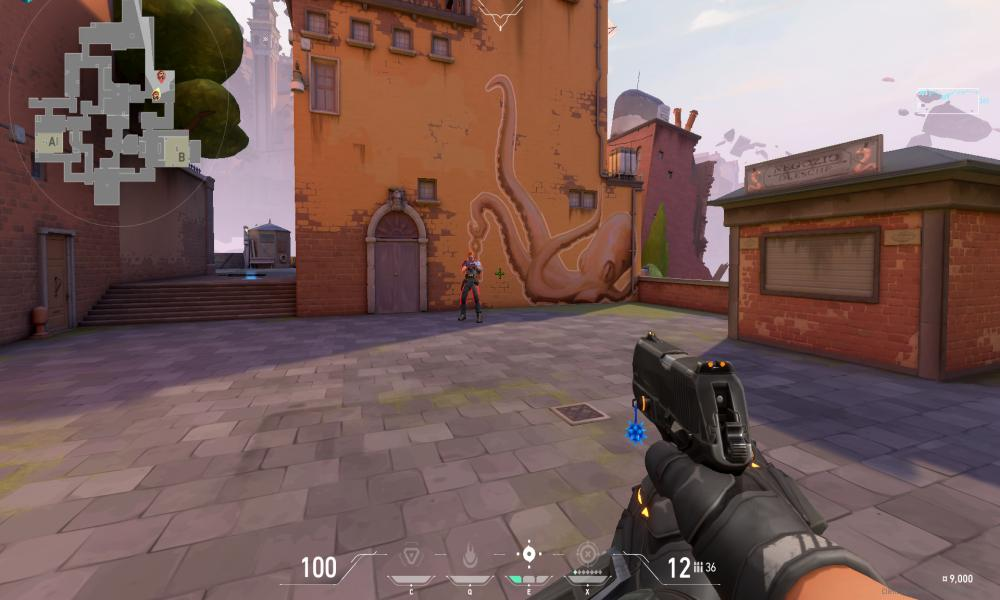

In [ ]:
# Show a random image from the custom Valorant dataset
img_path = "FSOD-Valorant-4/test/Valorant-Screenshot-2023-03-27-22-22-15-80_png.rf.94bb19bd9c85c61e109488d5a7b6e8fa.jpg"

im = cv2.imread(img_path)
cv2_imshow(im)

In [ ]:
# Setting up a base model predictor and making prediction

config_file_name = "configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml"
checkpoint_url_name = "http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth"

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Making config
cfg = get_cfg()
cfg.merge_from_file(config_file_name)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE = DEVICE
# Feel free to find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = checkpoint_url_name
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/18 19:47:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth ...


model_final.pth: 483MB [00:34, 13.9MB/s]                           
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)


In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([10], device='cuda:0')
Boxes(tensor([[454.7667, 249.9657, 489.0134, 321.2336]], device='cuda:0'))


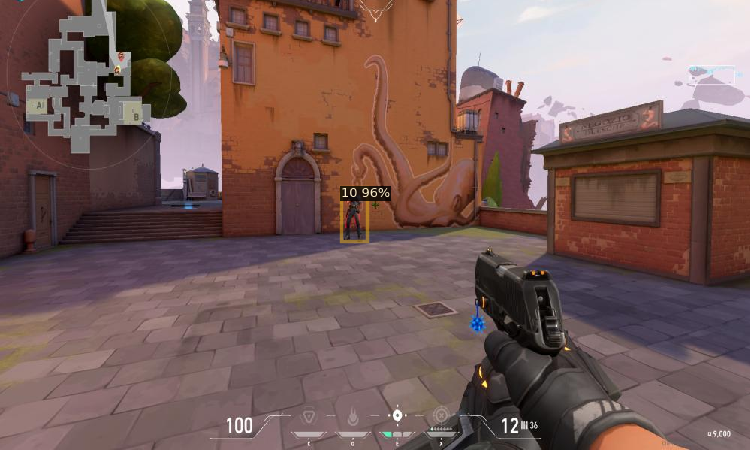

In [ ]:
# We can use `Visualizer` to draw the predictions from the base model on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Registering custom dataset

from detectron2.data.datasets import register_coco_instances

train_valorant_dataset = 'fsod-valorant-4-train'
test_valorant_dataset = 'fsod-valorant-4-test'

register_coco_instances(train_valorant_dataset, {}, "FSOD-Valorant-4/train/_annotations.coco.json", "FSOD-Valorant-4/train")
register_coco_instances(test_valorant_dataset, {}, "FSOD-Valorant-4/test/_annotations.coco.json", "FSOD-Valorant-4/test")

In [ ]:
# Creating dataloader from custom dataset

from detectron2.data import build_detection_train_loader
from detectron2.data import DatasetMapper

batch_size = 1

train_dl = build_detection_train_loader(DatasetCatalog.get(train_valorant_dataset), mapper=DatasetMapper(cfg, is_train=True), total_batch_size=batch_size)
test_dl = build_detection_train_loader(DatasetCatalog.get(test_valorant_dataset), mapper=DatasetMapper(cfg, is_train=True), total_batch_size=batch_size)

WARNING [04/18 19:47:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/18 19:47:45 d2.data.datasets.coco]: Loaded 100 images in COCO format from FSOD-Valorant-4/train/_annotations.coco.json
[04/18 19:47:46 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[04/18 19:47:46 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[04/18 19:47:46 d2.data.common]: Serializing 100 elements to byte tensors and concatenating them all ...
[04/18 19:47:46 d2.data.common]: Serialized dataset takes 0.03 MiB
WARNING [04/18 19:47:46 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/18 19:47:46 d2.data.datasets.coco]: Loaded 100 images in COCO format f

Instances(num_instances=1, image_height=608, image_width=1013, fields=[gt_boxes: Boxes(tensor([[469.0190, 244.2133, 505.9935, 336.9333]])), gt_classes: tensor([10])])


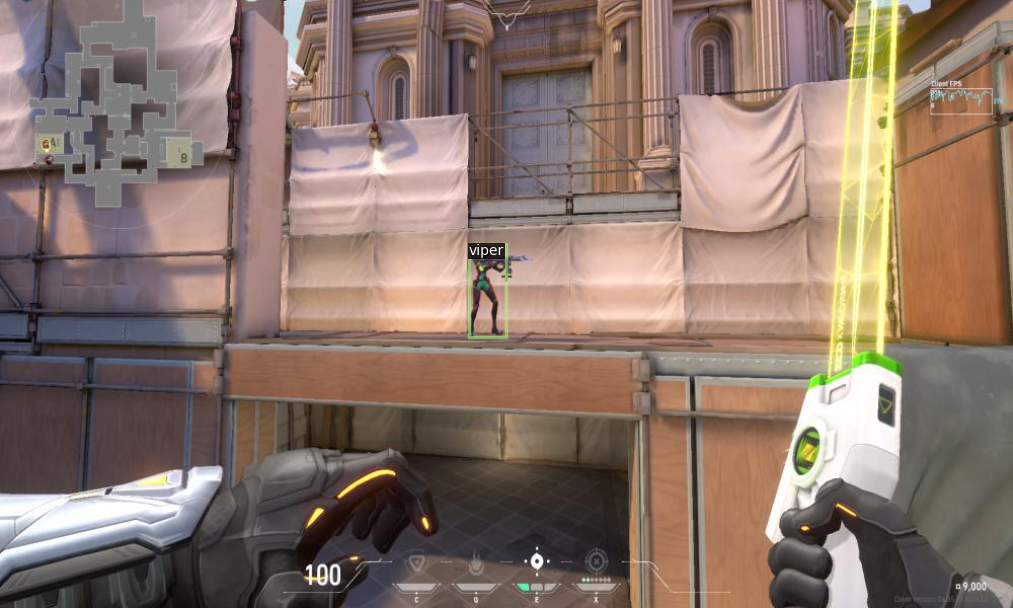

In [ ]:
# Making sure the custom dataset is correctly loaded

skip_first = 3 # skip the first k images in batch to visualize k+1th image

for i, x in enumerate(train_dl):
  if i in range(skip_first): continue
  print(x[0]['instances'])
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  metadata = MetadataCatalog.get(train_valorant_dataset)
  v = Visualizer(img, metadata) # Defining visualizer with image
  target_fields = x[0]["instances"].get_fields()
  labels = [metadata.thing_classes[i] for i in target_fields["gt_classes"]] # Mapping class indices to class names for labels
  vis = v.overlay_instances(  # Creating VisImage made from visualizer with boxes
      labels=labels,
      boxes=target_fields.get("gt_boxes", None),
      )
  cv2_imshow(vis.get_image()[:, :, ::-1])
  break

In [ ]:
# Build model from cfg and save the .pth file using a Checkpointer

from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

model = build_model(cfg)

DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)  # load a file, usually from cfg.MODEL.WEIGHTS
checkpointer = DetectionCheckpointer(model, save_dir="./")
checkpointer.save("base_detection_model")
%ls

[04/18 19:47:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth ...
base_detection_model.pth  fsdet/              pyproject.toml
configs/                  FSOD_Project.ipynb  README.md*
datasets/                 FSOD-Valorant-4/    requirements-dev.txt
demo/                     last_checkpoint     requirements.txt*
docs/                     LICENSE*            tools/


In [ ]:
# Making base model with fresh final layer

# Randomly initialize final layer weights 
# Saved as ./model_reset_surgery.pth
!python3 -m tools.ckpt_surgery \
        --src1 ./base_detection_model.pth \
        --method randinit \
        --save-dir ./

# New model with randomly initialized final layer (with the 20 VOC classes)
# Making config
cfg_ri = get_cfg()
cfg_ri.merge_from_file(config_file_name)
cfg_ri.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set threshold for this model
cfg_ri.MODEL.DEVICE = DEVICE
cfg_ri.MODEL.WEIGHTS = "./model_reset_surgery.pth"
predictor_ri = DefaultPredictor(cfg_ri)
outputs_ri = predictor_ri(im)

save changed ckpt to ./model_reset_surgery.pth
[04/20 03:43:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./model_reset_surgery.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


tensor([ 9,  9, 10, 10,  8,  9,  9,  8,  9, 10,  4,  9,  9,  9,  9, 10,  0,  0,
         8, 10,  7, 10, 10, 10,  8,  8, 10,  8, 10,  9,  0,  8,  0,  8, 10, 10,
         0, 10, 10,  8,  0,  0,  1,  0,  8,  0,  8,  0,  8, 14, 14, 10,  0,  0,
        10, 10, 10, 14,  0,  8,  4,  0, 10, 10,  8, 10,  1, 14,  8,  9,  0,  0,
         9, 10,  0,  8,  9,  4,  9,  4,  0,  8, 14,  8,  8,  8,  0, 10, 10, 10,
         0, 10], device='cuda:0')
Boxes(tensor([[5.0537e+02, 5.7116e+02, 5.4143e+02, 5.8900e+02],
        [5.2301e+02, 5.5951e+02, 5.4091e+02, 5.9088e+02],
        [3.8784e+02, 1.8607e+02, 6.3069e+02, 3.7958e+02],
        [6.2205e+02, 4.1800e+02, 7.5001e+02, 5.4142e+02],
        [4.8008e+02, 2.0563e+02, 5.1705e+02, 3.0063e+02],
        [5.0787e+02, 5.7261e+02, 5.2907e+02, 5.9189e+02],
        [4.8458e+02, 5.6267e+02, 5.7120e+02, 5.9387e+02],
        [5.6267e+02, 1.7793e+02, 5.8958e+02, 2.1860e+02],
        [5.1678e+02, 5.7027e+02, 5.6601e+02, 5.9276e+02],
        [6.2899e+02, 3.8444e+02, 6.435

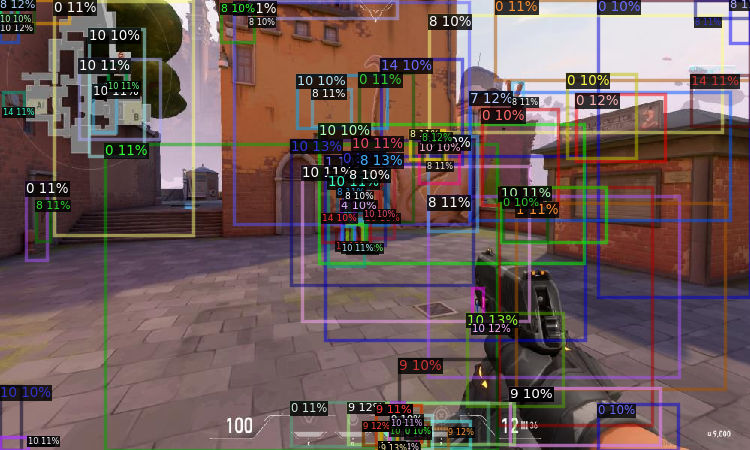

In [ ]:
# Getting outputs on model with random initialization on final layer (should suck)
print(outputs_ri["instances"].pred_classes)
print(outputs_ri["instances"].pred_boxes)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs_ri["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Begin fine-tuning training stage on custom Valorant dataset
#0.01 lr
!python3 -m tools.train_net --num-gpus 1 \
       --config-file configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml \
        --opts MODEL.WEIGHTS ./model_reset_surgery.pth

Command Line Args: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_surgery.pth'])
[04/20 04:21:21 detectron2]: Rank of current process: 0. World size: 1
[04/20 04:21:21 detectron2]: Command line arguments: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_surgery.pth'])
[04/20 04:21:21 detectron2]: Contents of args.config_file=configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml:
_BASE_: "../Base-RCNN-FPN.y

In [ ]:
print(MetadataCatalog.get(train_valorant_dataset))

Metadata(name='fsod-valorant-4-train', json_file='FSOD-Valorant-4/train/_annotations.coco.json', image_root='FSOD-Valorant-4/train', evaluator_type='coco', thing_classes=['valorant-agents', 'breach', 'brimstone', 'cypher', 'jett', 'omen', 'phoenix', 'raze', 'sage', 'sova', 'viper'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10})


In [ ]:
# Evaluate the model

!python3 -m tools.test_net --num-gpus 1 \
        --config-file configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml \
        --eval-only

Command Line Args: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=True, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=None)
[04/21 15:30:44 detectron2]: Rank of current process: 0. World size: 1
[04/21 15:30:44 detectron2]: Command line arguments: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=True, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=None)
[04/21 15:30:44 detectron2]: Contents of args.config_file=configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml:
_BASE_: "../Base-RCNN-FPN.yaml"
MODEL:
  WEIGHTS: "./model_final.pth"
  MASK_ON: False
  RESNETS:
    DEPTH: 101


In [ ]:
# Creating fine-tuned model from checkpoint

cfg_ft = get_cfg()
cfg_ft.merge_from_file(config_file_name)
cfg_ft.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.12  # set threshold for this model
cfg_ft.MODEL.DEVICE = DEVICE
cfg_ft.MODEL.WEIGHTS = "./checkpoints/model_final.pth"

Instances(num_instances=1, image_height=576, image_width=960, fields=[gt_boxes: Boxes(tensor([[499., 210., 512., 237.]])), gt_classes: tensor([3])])
[04/21 15:38:23 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./checkpoints/model_final.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


tensor([14,  7, 14, 14,  9,  9, 14,  9], device='cuda:0')
Boxes(tensor([[3.7179e-01, 0.0000e+00, 2.3720e+01, 5.9647e+01],
        [5.7568e+01, 7.2379e-03, 2.5212e+02, 2.1512e+01],
        [7.5209e-01, 5.6073e+02, 5.0373e+01, 5.7587e+02],
        [1.6131e+02, 2.2115e-02, 3.8040e+02, 1.5264e+01],
        [0.0000e+00, 1.9631e+02, 1.8246e+01, 3.5321e+02],
        [4.7255e-01, 5.4216e+02, 1.2792e+02, 5.7600e+02],
        [9.5918e+02, 0.0000e+00, 9.6000e+02, 8.8376e+00],
        [7.9113e-01, 1.0533e+02, 2.9175e+02, 5.7527e+02]], device='cuda:0'))


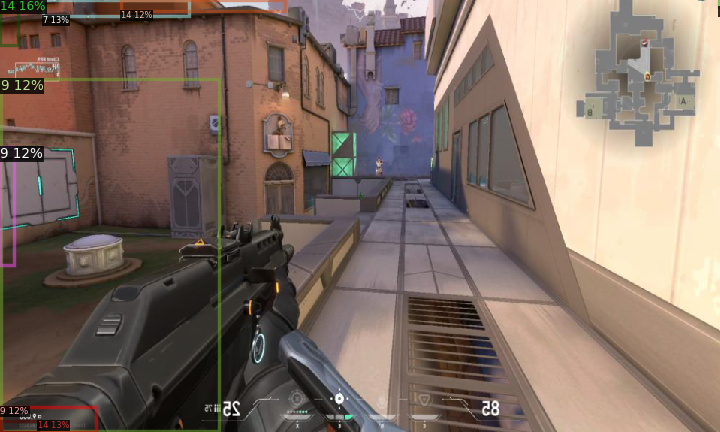

In [ ]:
# Visualizing results of model fine-tuned on custom Valorant data

#grabbing an img
skip_first = 24 # skip the first k images in batch to visualize k+1th image
img = None
for i, x in enumerate(train_dl):
  if i in range(skip_first): continue
  print(x[0]['instances'])
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  break

predictor_ft = DefaultPredictor(cfg_ft)
outputs_ft = predictor_ft(img)

print(outputs_ft["instances"].pred_classes)
print(outputs_ft["instances"].pred_boxes)
v = Visualizer(img, MetadataCatalog.get(cfg_ft.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs_ft["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])